# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root");
//TFile *file = TFile::Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root");

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................


<p>The next step is to extract the varibles we want from the dataset. We will plot first an <b>"event"</b> variable: the number of primary vertices: 

In [4]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _a first way to plot a variable_. The two following arguments define the width and the height of the canvas.

In [5]:
TCanvas *canvas = new TCanvas("Canvas","a first way to plot a variable",800,600);

Now we define a histogram that will later be placed on this canvas. Its name is NPV and the header of the histogram is Example plot: Number of primary vertices. The three following arguments indicate that this histogram contains 50 so called bins which have a range from 1 to 50.

In [6]:
TH1F *hist_npv = new TH1F("NPV","Example plot: Number of primary vertices; NPV ; Events ",50,1,50);

The following lines are a loop that goes over the data that is stored in the tree and fills the histogram that we already defined. In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word</p>
__Done!__.

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv->Fill(npv);
}

std::cout << "Done!" << std::endl;

Done!


<p>After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies:</p>

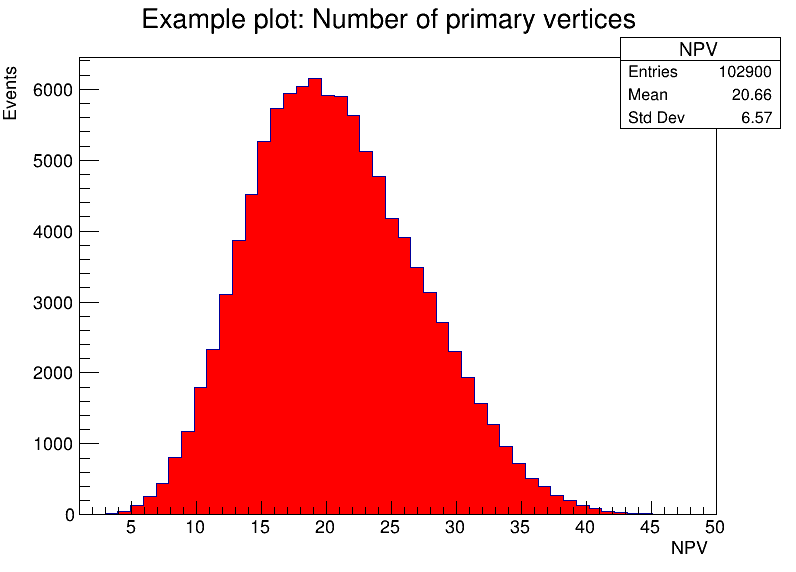

In [8]:
hist_npv->SetFillColor(kRed);
hist_npv->Draw();
canvas->Draw();

In [9]:
Float_t scale = hist_npv->Integral();
hist_npv->Scale(1/scale);
hist_npv->SetFillColor(2);

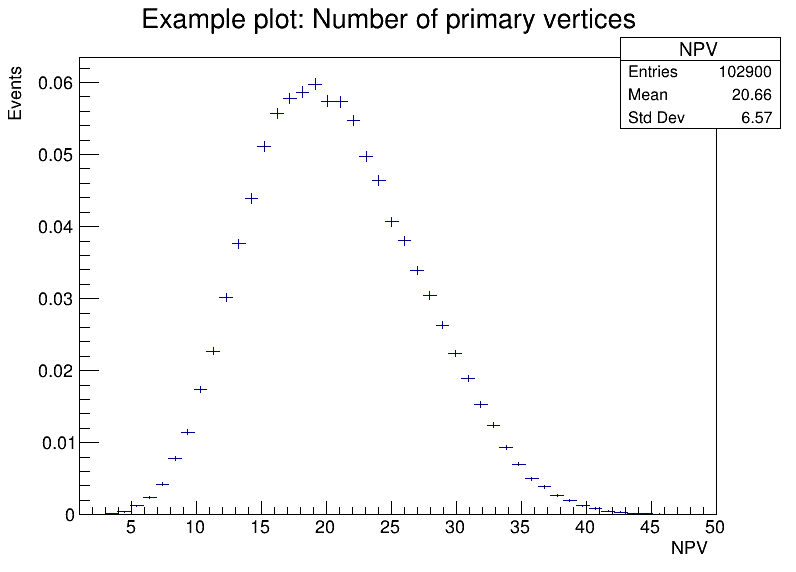

In [10]:
hist_npv->DrawNormalized();
canvas->Draw();

<b>Excercises: 
    1. Plot the number of average interactions per bunch-crossing (mu_average)
    2. Make a 2D histogram of NPV vs. mu
</b>

<b> 
    1. Plot the number of average interactions per bunch-crossing
</b>

In [11]:
Float_t mu_averag = -1; 
tree->SetBranchAddress("mu_average", &mu_averag);

In [12]:
TH1F *hist_mu_averag = new TH1F("mu_average","Example plot: number of average interactions; mu_average ; Events ",50,1,50);

In [13]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_mu_averag->Fill(mu_averag);
}

std::cout << "Done!" << std::endl;

Done!


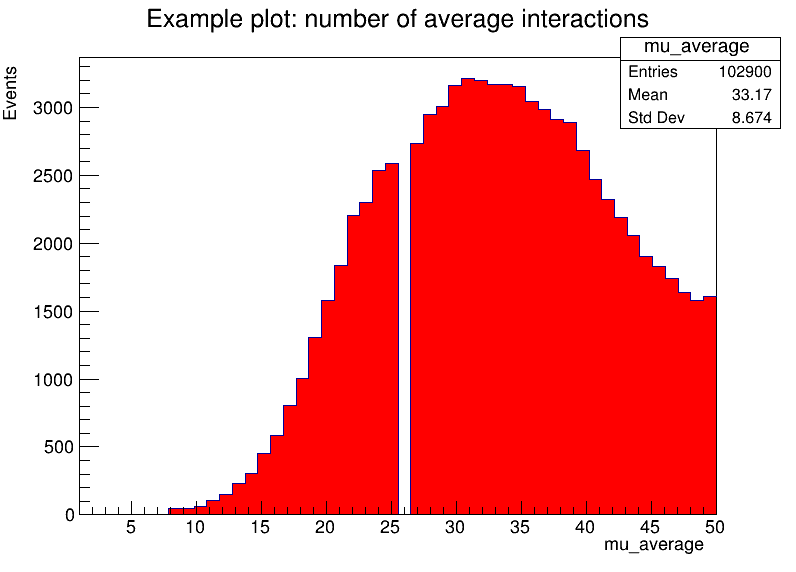

In [14]:
hist_mu_averag->SetFillColor(kRed);
hist_mu_averag->Draw();
canvas->Draw();

<b>Excercises: 
Histogram of NPV vs. mu
</b>

	TH2F(const char* name, const char* title, Int_t nbinsx, Double_t xlow, Double_t xup, Int_t nbinsy, Double_t ylow, Double_t yup)

In [15]:
TH2F *hist_mu_averag_vs_NPV = new TH2F("mu_average_Vs_NPV:","Plot:mu_average_vs_NPV_vs_NPV",50,1,50,50,1,100)

(TH2F *) 0x7fafbc7029c0


In [16]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_mu_averag_vs_NPV->Fill(npv,mu_averag);
}

std::cout << "Done!" << std::endl;

Done!


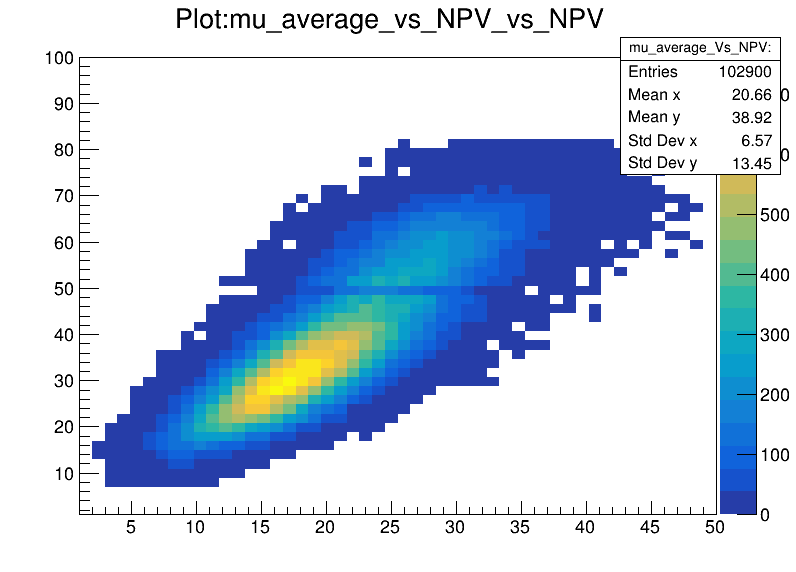

In [17]:
hist_mu_averag_vs_NPV->SetFillColor(kRed);
hist_mu_averag_vs_NPV->Draw("colz");
canvas->Draw();

-----

Some branches are not event variables, but objects with some kinematical infomation. They are stored in vectors. For example tracks and clusters. We will create two histograms to store the number of tracks and clusters in each event. 

In [18]:
TH1F *hist_nTrks = new TH1F("NTracks","Example plot: Number of tracks; NTracks ; Events ",50,0,1000);
TH1F *hist_nCltrs = new TH1F("NClusters","Example plot: Number of clusters; NClusters ; Events ",50,0,1000);

Now we activate two branches

In [19]:
vector<float> *tracks_pt;
vector<float> *clusters_pt;

tree->SetBranchAddress("Tracks_pt", &tracks_pt);
tree->SetBranchAddress("Clusters_pt", &clusters_pt);

For each event, fill the histograms with the size of the vectors

In [20]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_nTrks->Fill(tracks_pt->size());
    hist_nCltrs->Fill(clusters_pt->size());

}

std::cout << "Done!" << std::endl;

Done!


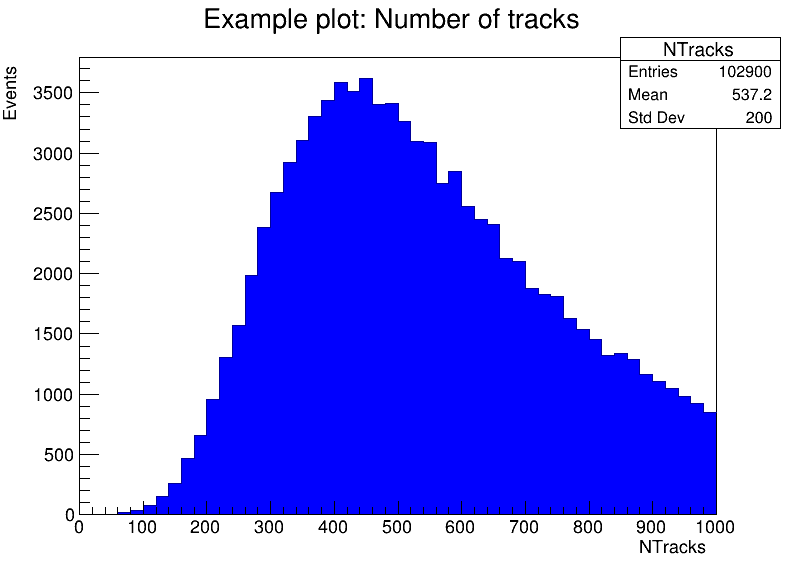

In [21]:
hist_nTrks->SetFillColor(kBlue);
hist_nTrks->Draw();
canvas->Draw();

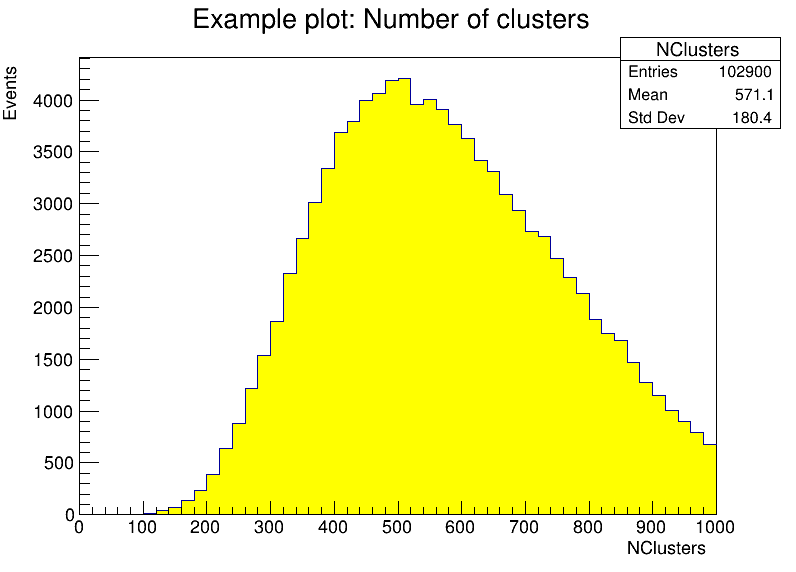

In [22]:
hist_nCltrs->SetFillColor(kYellow);
hist_nCltrs->Draw();
canvas->Draw();

<b>Excercise: 
        3. Make a 2D histogram of NPV and mu vs. nTracks and nClusters: NPV vs. nTrack, NPV vs. nClusters, mu vs. nTrack, mu vs. NClusters
</b>

<b>
NPV vs. nTrack
</b>

In [23]:
TH2F *hist_NPV_vs_nTrack = new TH2F("NPV_vs_nTrack","Plot:NPV_vs_nTrack",50,1,50,100,1,1100)

(TH2F *) 0x7fafd5427610


In [24]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_NPV_vs_nTrack->Fill(npv,tracks_pt->size());
}

std::cout << "Done!" << std::endl;

Done!


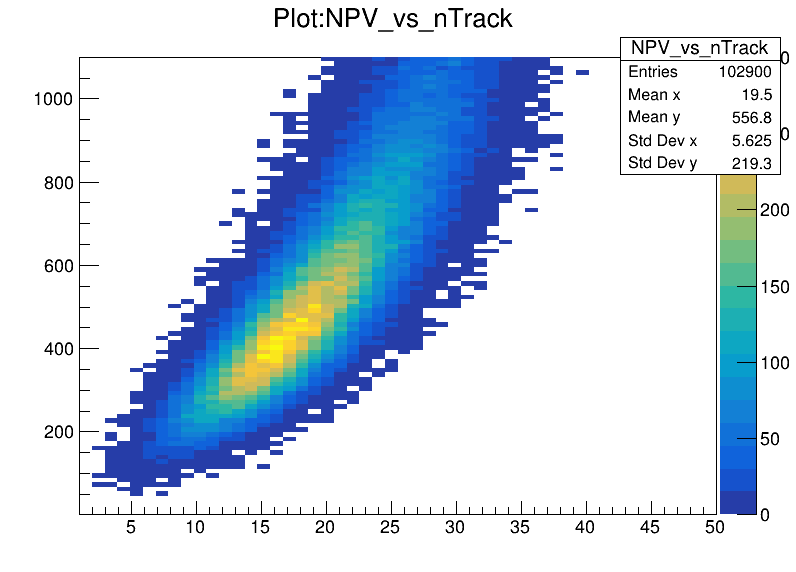

In [25]:
hist_NPV_vs_nTrack->SetFillColor(kRed);
hist_NPV_vs_nTrack->Draw("colz");
canvas->Draw();

<b>
NPV vs. nClusters
</b>

In [26]:
TH2F *hist_NPV_vs_nClusters = new TH2F("NPV_vs_nClusters","Plot:NPV_vs_nClusters",50,1,50,100,1,1000)

(TH2F *) 0x7fafd7a74630


In [27]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_NPV_vs_nClusters->Fill(npv,clusters_pt->size());
}

std::cout << "Done!" << std::endl;

Done!


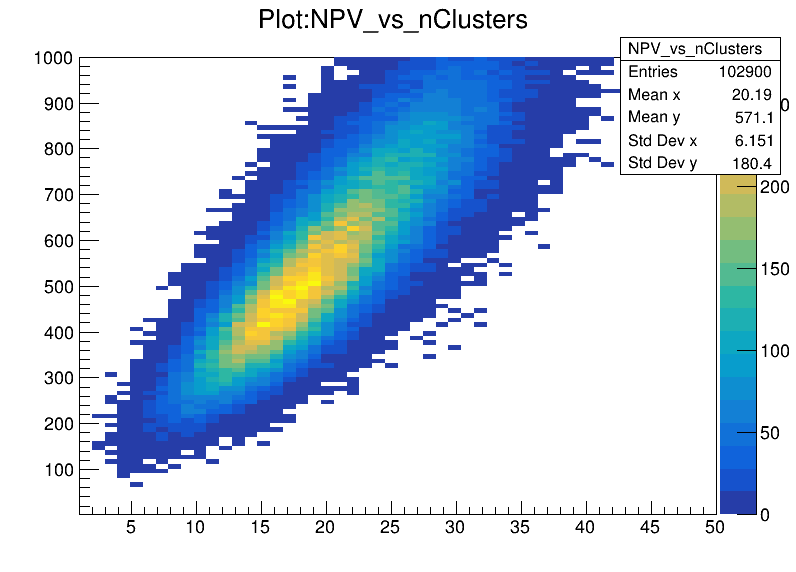

In [28]:
hist_NPV_vs_nClusters->SetFillColor(kRed);
hist_NPV_vs_nClusters->Draw("colz");
canvas->Draw();

<b>
mu vs. nTrack
</b>

In [29]:
TH2F *hist_mu_vs_nTrack = new TH2F("mu_vs_nTrack","Plot:mu_vs_nTrack",50,1,50,100,1,1000)

(TH2F *) 0x7fafd73c7bd0


In [30]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_mu_vs_nTrack->Fill(mu_averag,tracks_pt->size());
}

std::cout << "Done!" << std::endl;

Done!


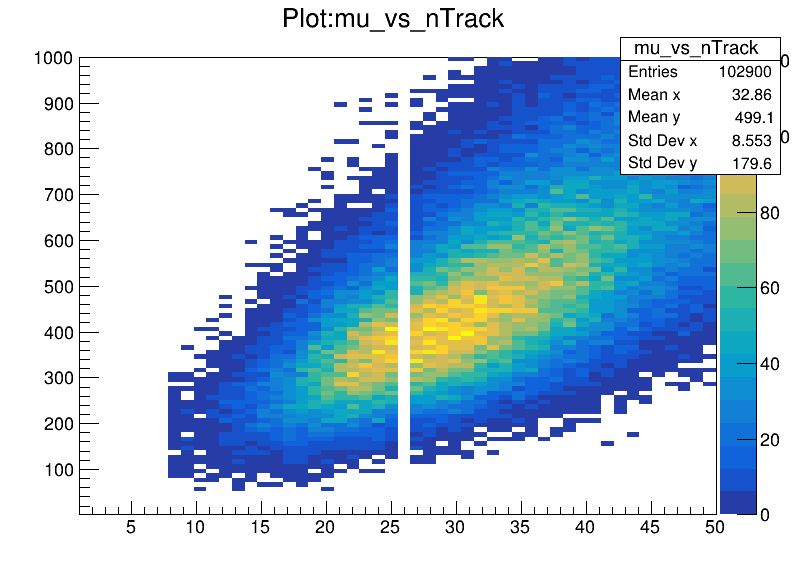

In [31]:
hist_mu_vs_nTrack->SetFillColor(kRed);
hist_mu_vs_nTrack->Draw("colz");
canvas->Draw();

<b>
mu vs. nClusters
</b>

In [32]:
TH2F *hist_mu_vs_nClusters = new TH2F("mu_vs_nClusters","Plot:mu_vs_nClusters",50,1,50,50,1,1000)

(TH2F *) 0x7fafd52974f0


In [33]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_mu_vs_nClusters->Fill(mu_averag,clusters_pt->size());
}

std::cout << "Done!" << std::endl;

Done!


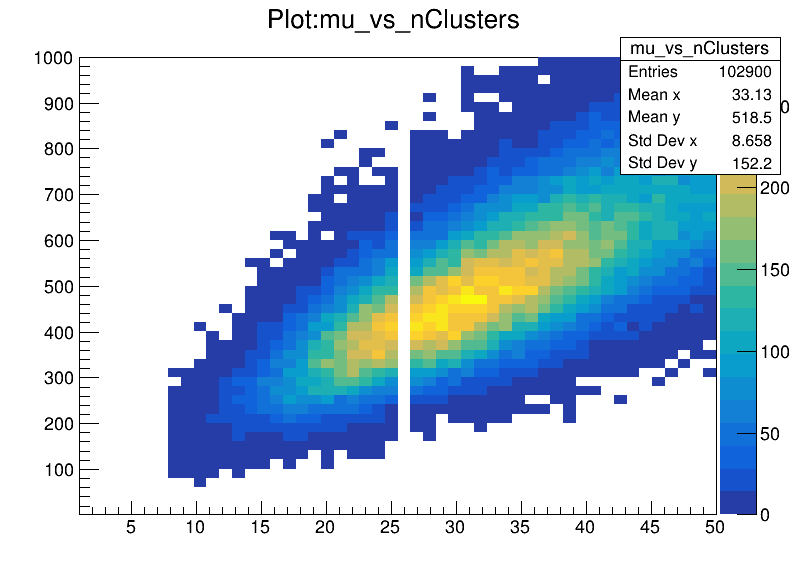

In [34]:
hist_mu_vs_nClusters->SetFillColor(kRed);
hist_mu_vs_nClusters->Draw("colz");
canvas->Draw();

<b>
Now let us plot the pT of the "lead" track:
</b>

In [35]:
TH1F *hist_track_pT = new TH1F("Track_pT","Example plot: Track pT; pT (MeV) ; Events ",100,490,690);

In [36]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_pt->size(); tr++)
    {
        hist_track_pT->Fill(tracks_pt->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


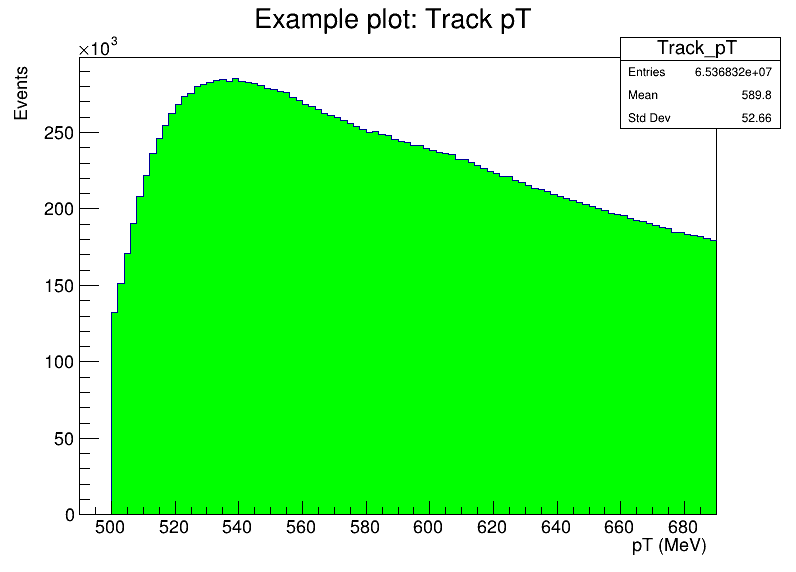

In [37]:
hist_track_pT->SetFillColor(kGreen);
hist_track_pT->Draw();
canvas->Draw();

<b>Excercises: 
4. Plot all track, cluster and particle variables
5. Interpret the meaning of each variable
6. What is "Particle PDG ID"?
</b>

## Particle pdg_ID:

<b>  Identifica en cada evento un tipo de particula, por lo cual cada ID corresponde a una particula diferente  <b>

# tracks

<b>
    Tracks_eta
</b>

In [38]:
vector<float> *Tracks_eta;

tree->SetBranchAddress("Tracks_eta", &Tracks_eta);

In [39]:
TH1F *hist_Tracks_eta = new TH1F("Tracks_eta","Example plot: Tracks_eta; eta ; Events ",100,-5,5);

In [40]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Tracks_eta->size(); tr++)
    {
        hist_Tracks_eta->Fill(Tracks_eta->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


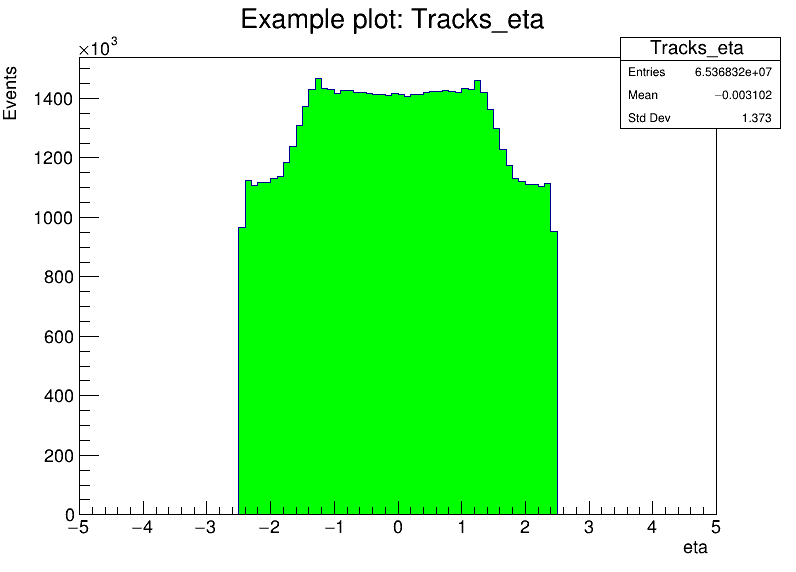

In [41]:
hist_Tracks_eta->SetFillColor(kGreen);
hist_Tracks_eta->Draw();
canvas->Draw();

Indica el numero me tracks detectados en funcion del parametro eta. El hecho que solo vaya hasta alrededor de 2,5 es por cuestiones deldetector que solo cubre esa region forward. Lo cual ademas coresponde a la region del detector interno de ATLAS para particulas cargadas. 

<b>
    Tracks_phi
</b>

In [42]:
vector<float> *Tracks_phi;

tree->SetBranchAddress("Tracks_phi", &Tracks_phi);

In [43]:
TH1F *hist_Tracks_phi = new TH1F("Tracks_phi","Example plot: Tracks_phi; phi ; Events ",100,-5,5);

In [44]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Tracks_phi->size(); tr++)
    {
        hist_Tracks_phi->Fill(Tracks_phi->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


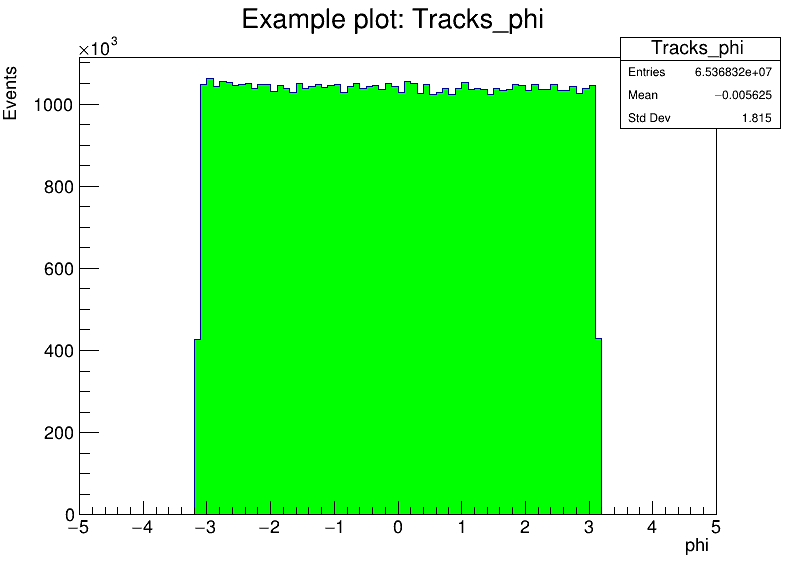

In [45]:
hist_Tracks_phi->SetFillColor(kGreen);
hist_Tracks_phi->Draw();
canvas->Draw();

Numero de Tracks en funcion al angulo azimutal phi

<b>
    Tracks_m
</b>

In [46]:
vector<float> *Tracks_m;

tree->SetBranchAddress("Tracks_m", &Tracks_m);

In [47]:
TH1F *hist_Tracks_m = new TH1F("Tracks_m","Example plot: Tracks_m; pT (MeV) ; Events ",100,0,500);

In [48]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Tracks_m->size(); tr++)
    {
        hist_Tracks_m->Fill(Tracks_m->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


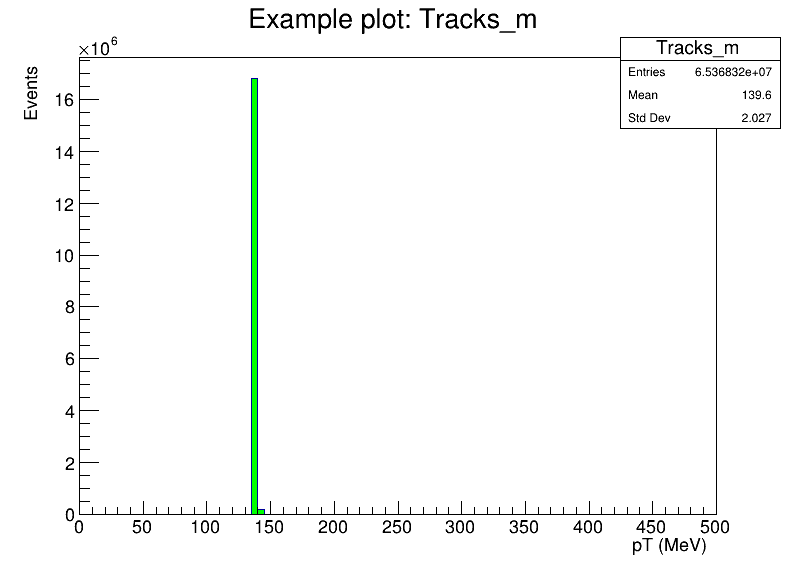

In [49]:
hist_Tracks_m->SetFillColor(kGreen);
hist_Tracks_m->Draw();
canvas->Draw();

Masa de as particulas de los tracks.
Masa pion cargado = 139.5 MeV (si se hace zoom se ve mejor que encaja)

<b>
    Tracks_vtx
</b>

In [50]:
vector<float> *Tracks_vtx;

tree->SetBranchAddress("Tracks_vtx", &Tracks_vtx);

In [51]:
TH1F *hist_Tracks_vtx = new TH1F("Tracks_vtx","Example plot: Tracks_vtx; Tracks_vtx ; Events ",100,-10,30);

In [52]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Tracks_vtx->size(); tr++)
    {
        hist_Tracks_vtx->Fill(Tracks_vtx->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


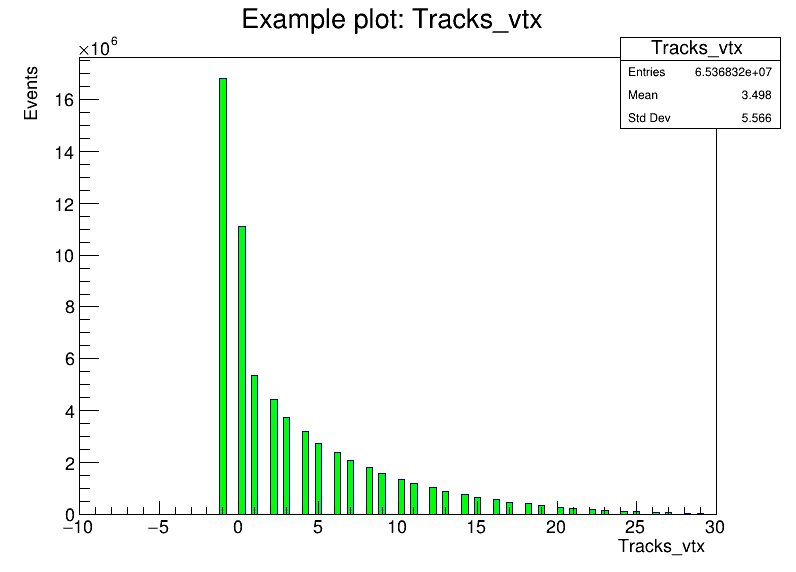

In [53]:
hist_Tracks_vtx->SetFillColor(kGreen);
hist_Tracks_vtx->Draw();
canvas->Draw();

# Clusters

<b> Clusters_pt </b>

In [54]:
vector<float> *Clusters_pt;

tree->SetBranchAddress("Clusters_pt", &Clusters_pt);

In [108]:
TH1F *hist_Clusters_pt = new TH1F("Clusters_pt","Example plot: Clusters_pt; Clusters_pt (MeV) ; Events ",100,0,1200);

Warning in <TFile::Append>: Replacing existing TH1: Clusters_pt (Potential memory leak).


In [109]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Clusters_pt->size(); tr++)
    {
        hist_Clusters_pt->Fill(Clusters_pt->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


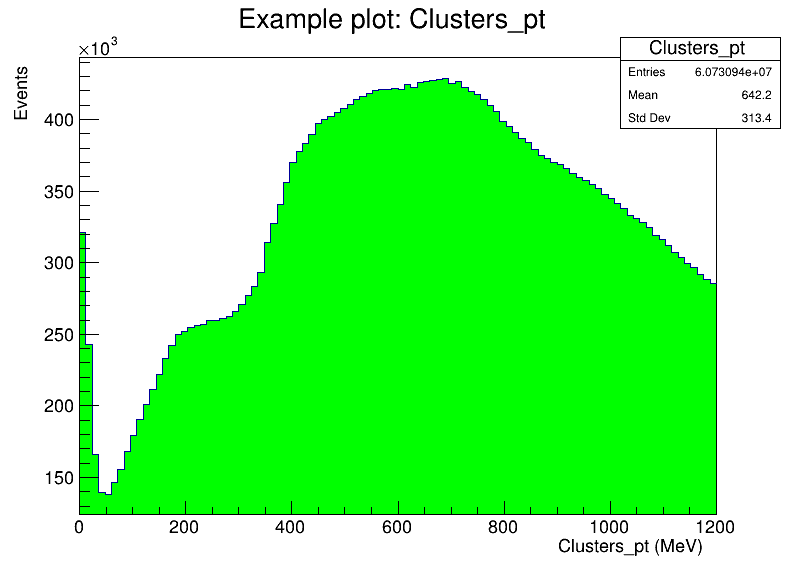

In [110]:
hist_Clusters_pt->SetFillColor(kGreen);
hist_Clusters_pt->Draw();
canvas->Draw();

<b> Clusters_eta </b>

In [58]:
vector<float> *Clusters_eta;

tree->SetBranchAddress("Clusters_eta", &Clusters_eta);

In [130]:
TH1F *hist_Clusters_eta = new TH1F("Clusters_eta","Example plot: Clusters_eta; eta ; Events ",100,-6,-6);

Warning in <TFile::Append>: Replacing existing TH1: Clusters_eta (Potential memory leak).


In [131]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Clusters_eta->size(); tr++)
    {
        hist_Clusters_eta->Fill(Clusters_eta->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


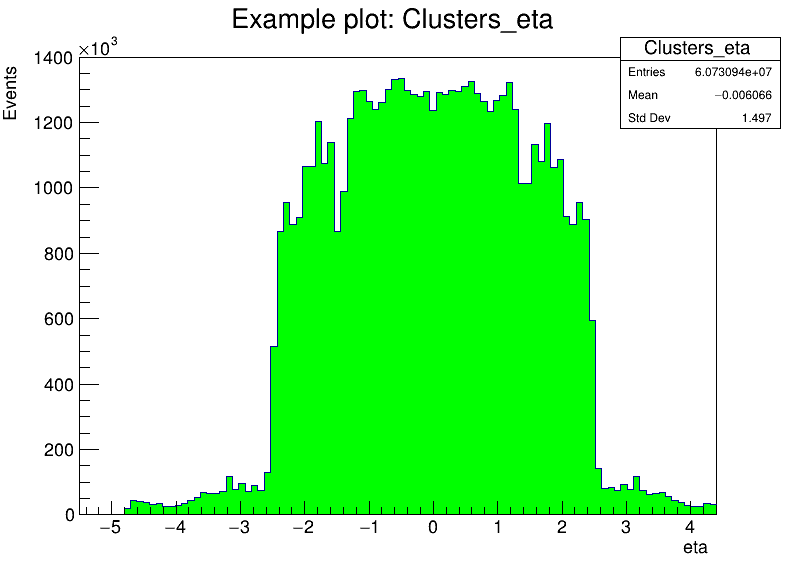

In [132]:
hist_Clusters_eta->SetFillColor(kGreen);
hist_Clusters_eta->Draw();
canvas->Draw();

Numero de Cluster detectados en funcion del parametro eta

Ademas el limite de la region forward en la que esta el detector es mayor lo cual pareciera corresponder al calorimetro hadronico que llega a tener una amplitud de 4.9

<b> Clusters_phi </b>

In [62]:
vector<float> *Clusters_phi;

tree->SetBranchAddress("Clusters_phi", &Clusters_phi);

In [63]:
TH1F *hist_Clusters_phi = new TH1F("Clusters_phi","Example plot: Clusters_phi; phi ; Events ",100,-4,4);

In [64]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Clusters_phi->size(); tr++)
    {
        hist_Clusters_phi->Fill(Clusters_phi->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


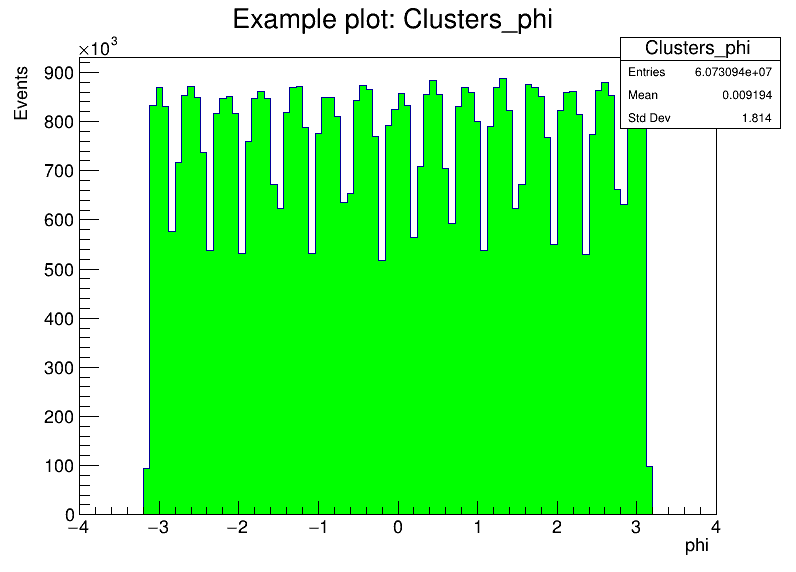

In [65]:
hist_Clusters_phi->SetFillColor(kGreen);
hist_Clusters_phi->Draw();
canvas->Draw();

Numero de Cluster detectados en funcion del angulo azimutal phi

<b> Clusters_m </b>

In [66]:
vector<float> *Clusters_m;

tree->SetBranchAddress("Clusters_m", &Clusters_m);

In [114]:
TH1F *hist_Clusters_m = new TH1F("Clusters_m","Example plot: Clusters_m; pT (MeV) ; Events ",100,0,500);

Warning in <TFile::Append>: Replacing existing TH1: Clusters_m (Potential memory leak).


In [115]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Clusters_m->size(); tr++)
    {
        hist_Clusters_m->Fill(Clusters_m->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


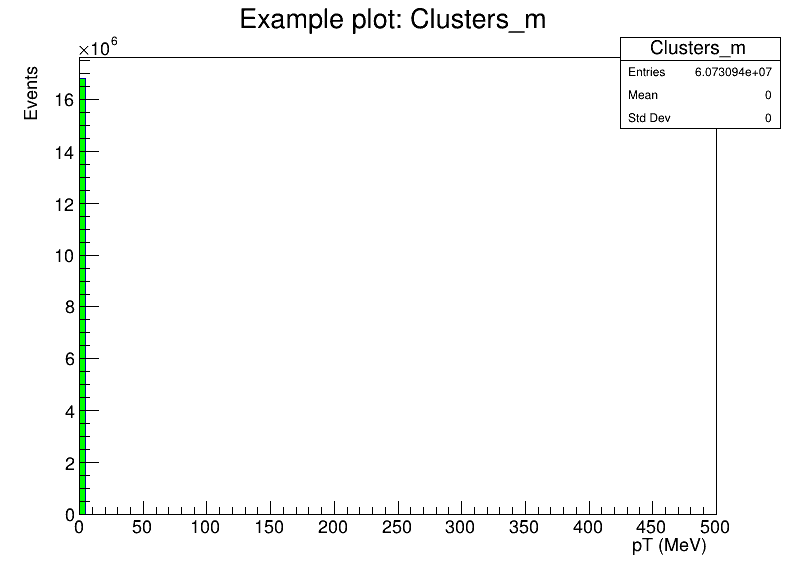

In [116]:
hist_Clusters_m->SetFillColor(kGreen);
hist_Clusters_m->Draw();
canvas->Draw();

Particulas de cada Cluster, Solo hay valor de m=0, es decir serian solo fotones

# Particles

<b> Particles_pt   </b>

In [70]:
vector<float> *Particles_pt;

tree->SetBranchAddress("Particles_pt", &Particles_pt);

In [121]:
TH1F *hist_Particles_pt = new TH1F("Particles_pt","Example plot: Particles_pt; Particles_pt(MeV) ; Events ",100,0,300);

Warning in <TFile::Append>: Replacing existing TH1: Particles_pt (Potential memory leak).


In [122]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_pt->size(); tr++)
    {
        hist_Particles_pt->Fill(Particles_pt->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


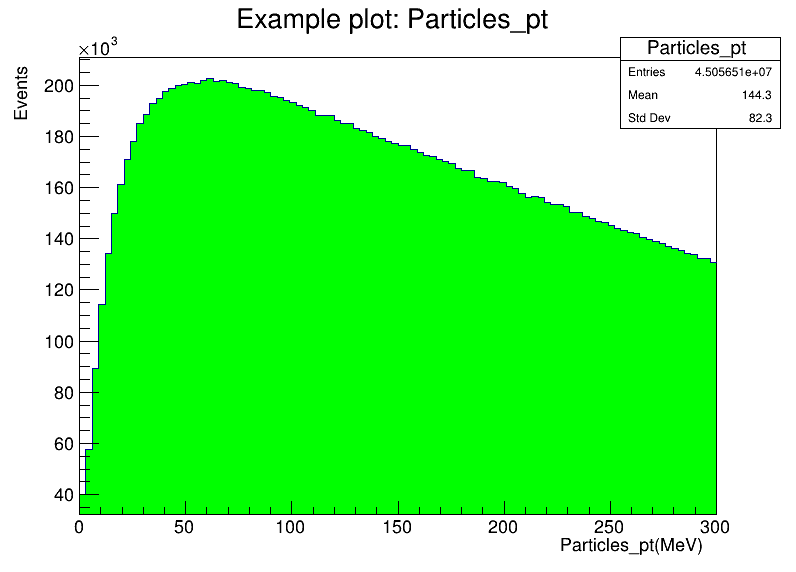

In [123]:
hist_Particles_pt->SetFillColor(kGreen);
hist_Particles_pt->Draw();
canvas->Draw();

Numeros de particulas reconstruidas en funcion del momento tansverso de ellas

<b> Particles_eta   </b>

In [74]:
vector<float> *Particles_eta;

tree->SetBranchAddress("Particles_eta", &Particles_eta);

In [124]:
TH1F *hist_Particles_eta = new TH1F("Particles_eta","Example plot: Particles_eta; eta ; Events ",100,-6,6);

Warning in <TFile::Append>: Replacing existing TH1: Particles_eta (Potential memory leak).


In [125]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_eta->size(); tr++)
    {
        hist_Particles_eta->Fill(Particles_eta->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


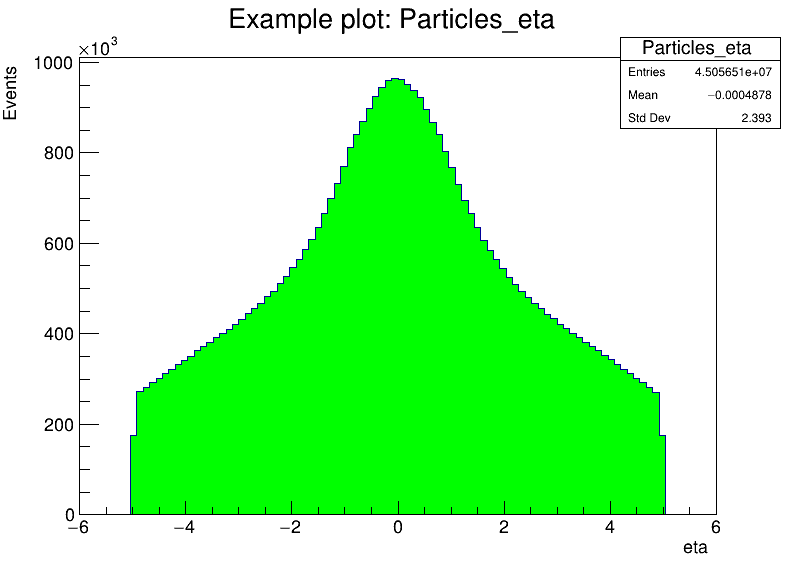

In [126]:
hist_Particles_eta->SetFillColor(kGreen);
hist_Particles_eta->Draw();
canvas->Draw();

Numero de particulas detectadas en funcion del parametro eta

<b> Particles_phi   </b>

In [78]:
vector<float> *Particles_phi;

tree->SetBranchAddress("Particles_phi", &Particles_phi);

In [79]:
TH1F *hist_Particles_phi = new TH1F("Particles_phi","Example plot: Particles_phi; phi ; Events ",50,-4,4);

In [80]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_phi->size(); tr++)
    {
        hist_Particles_phi->Fill(Particles_phi->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


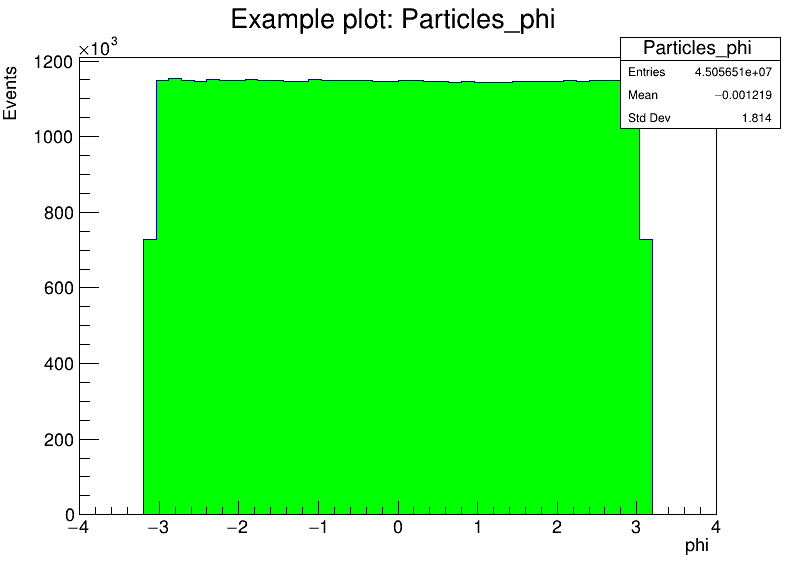

In [81]:
hist_Particles_phi->SetFillColor(kGreen);
hist_Particles_phi->Draw();
canvas->Draw();

Numero de particulas detectadas en funcion del angulo azimutal phi

<b> Particles_m   </b>

In [82]:
vector<float> *Particles_m;

tree->SetBranchAddress("Particles_m", &Particles_m);

In [83]:
TH1F *hist_Particles_m = new TH1F("Particles_m","Example plot: Particles_m; pT (MeV) ; Events ",150,0,500);

In [84]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_m->size(); tr++)
    {
        hist_Particles_m->Fill(Particles_m->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


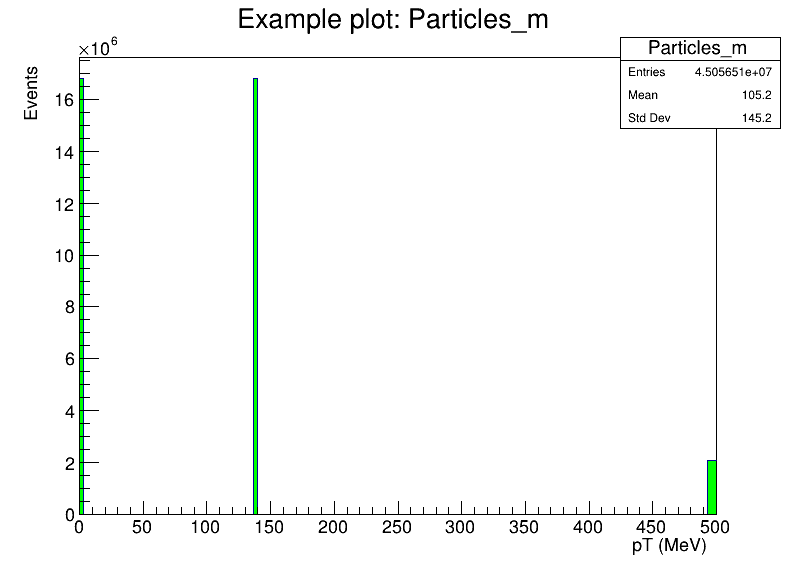

In [85]:
hist_Particles_m->SetFillColor(kGreen);
hist_Particles_m->Draw();
canvas->Draw();

Numero de particulas reconstruidas segun su masa.

<b> Veamos un plot del primer pico

In [86]:
TH1F *hist_Particles_m = new TH1F("Particles_m","Example plot: Particles_m; pT (MeV) ; Events ",100,0.001,1);

Warning in <TFile::Append>: Replacing existing TH1: Particles_m (Potential memory leak).


In [87]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_m->size(); tr++)
    {
        hist_Particles_m->Fill(Particles_m->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


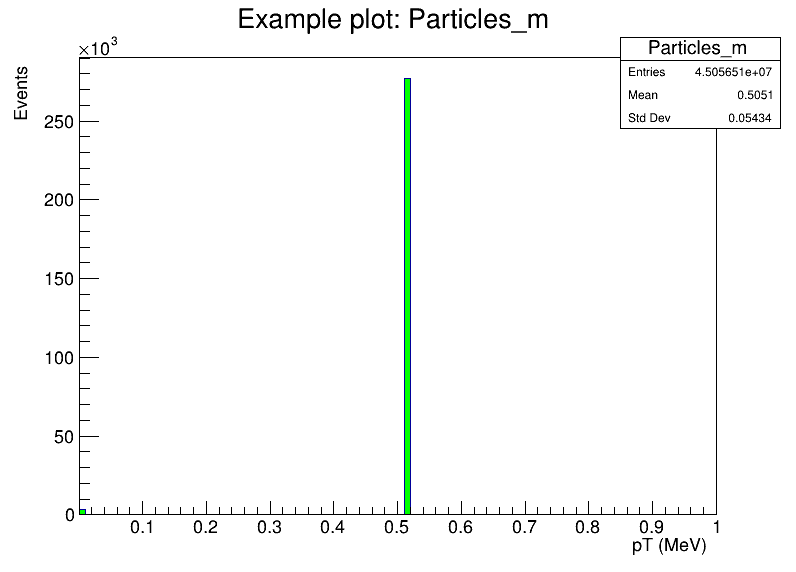

In [88]:
hist_Particles_m->SetFillColor(kGreen);
hist_Particles_m->Draw();
canvas->Draw();

Lo cual corresponde a la masa del electron (hubo muy MUY pocos eventos). Nota: el pico grande en cero corresponderia a masa cero (fotones).

<b> Veamos un plot de los piones

In [89]:
TH1F *hist_Particles_m = new TH1F("Particles_m","Example plot: Particles_m; pT (MeV) ; Events ",100,130,145);

Warning in <TFile::Append>: Replacing existing TH1: Particles_m (Potential memory leak).


In [90]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_m->size(); tr++)
    {
        hist_Particles_m->Fill(Particles_m->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


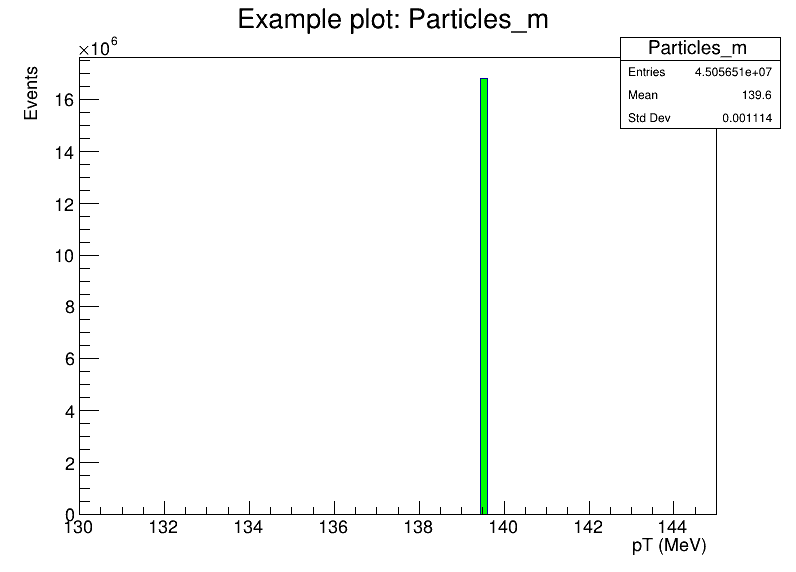

In [91]:
hist_Particles_m->SetFillColor(kGreen);
hist_Particles_m->Draw();
canvas->Draw();

Vemos la presencia de piones cargados, masa: 139.5

<b> Veamos un plot de los kaones

In [92]:
TH1F *hist_Particles_m = new TH1F("Particles_m","Example plot: Particles_m; pT (MeV) ; Events ",100,490,500);

Warning in <TFile::Append>: Replacing existing TH1: Particles_m (Potential memory leak).


In [93]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_m->size(); tr++)
    {
        hist_Particles_m->Fill(Particles_m->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


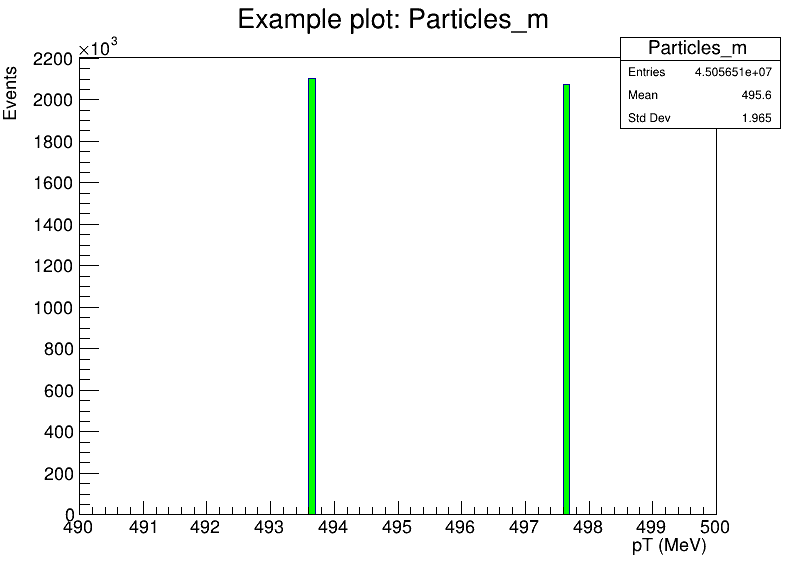

In [94]:
hist_Particles_m->SetFillColor(kGreen);
hist_Particles_m->Draw();
canvas->Draw();

A diferencia de los piones si hay kaones cargados: 493.67 MeV y neutros: 497.64 MeV

<b> Particles_pdgID   </b>

In [95]:
vector<float> *Particles_pdgID;

tree->SetBranchAddress("Particles_pdgID", &Particles_pdgID);

In [96]:
TH1F *hist_Particles_pdgID = new TH1F("Particles_pdgID","Example plot: Particles_pdgID; pdgID ; Events ",100,1,25);

In [97]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_pdgID->size(); tr++)
    {
        hist_Particles_pdgID->Fill(Particles_pdgID->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


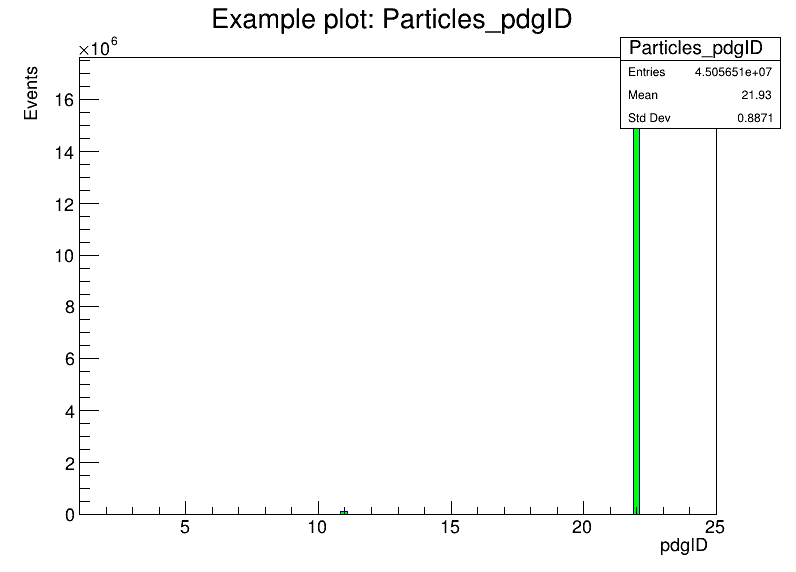

In [98]:
hist_Particles_pdgID->SetFillColor(kGreen);
hist_Particles_pdgID->Draw();
canvas->Draw();

pocos electrones (11) y muchos fotones (22)

<b> Veamos otros plot para ver el resto (entre 25 y 100 no hay nada) <b>

In [99]:
TH1F *hist_Particles_pdgID = new TH1F("Particles_pdgID","Example plot: Particles_pdgID; pdgID ; Events ",100,101,200);

Warning in <TFile::Append>: Replacing existing TH1: Particles_pdgID (Potential memory leak).


In [100]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_pdgID->size(); tr++)
    {
        hist_Particles_pdgID->Fill(Particles_pdgID->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


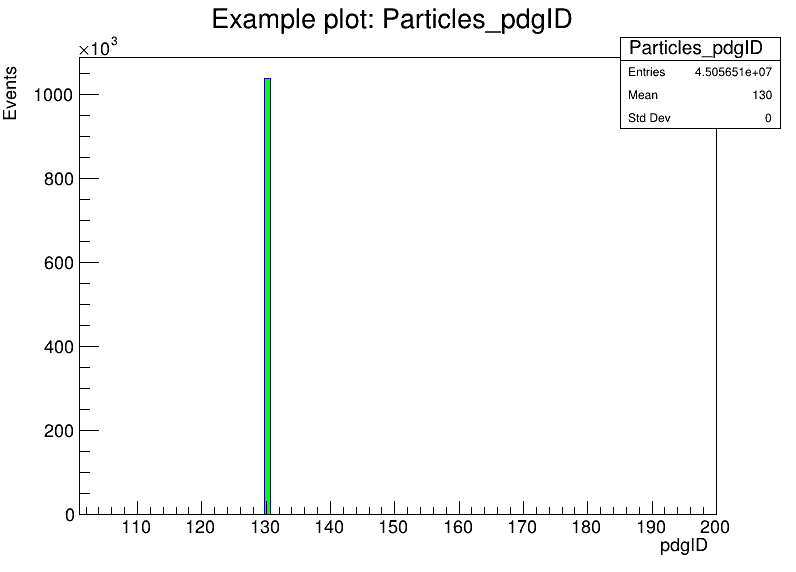

In [101]:
hist_Particles_pdgID->SetFillColor(kGreen);
hist_Particles_pdgID->Draw();
canvas->Draw();

130: kaones K_0^{L} (antisimetrico sd+ds)

In [102]:
TH1F *hist_Particles_pdgID = new TH1F("Particles_pdgID","Example plot: Particles_pdgID; pdgID ; Events ",100,201,220);

Warning in <TFile::Append>: Replacing existing TH1: Particles_pdgID (Potential memory leak).


In [103]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_pdgID->size(); tr++)
    {
        hist_Particles_pdgID->Fill(Particles_pdgID->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


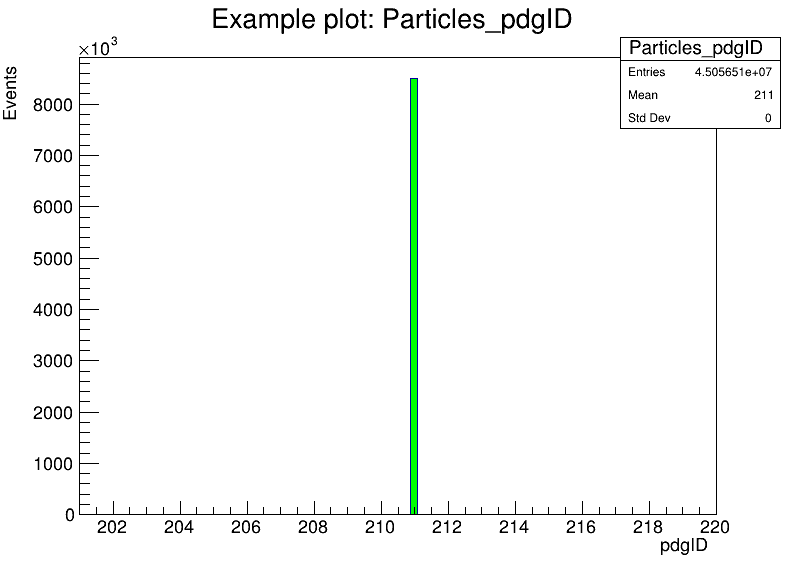

In [104]:
hist_Particles_pdgID->SetFillColor(kGreen);
hist_Particles_pdgID->Draw();
canvas->Draw();

211, lo cual corresponde a piones cargados (cuyas masas ya habiamos detectado)

In [105]:
TH1F *hist_Particles_pdgID = new TH1F("Particles_pdgID","Example plot: Particles_pdgID; pdgID ; Events ",100,300,330);

Warning in <TFile::Append>: Replacing existing TH1: Particles_pdgID (Potential memory leak).


In [106]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_pdgID->size(); tr++)
    {
        hist_Particles_pdgID->Fill(Particles_pdgID->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


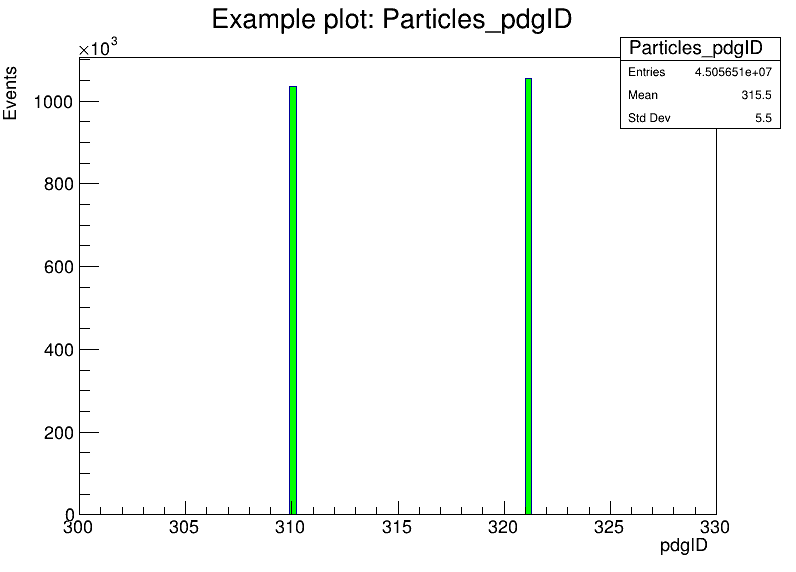

In [107]:
hist_Particles_pdgID->SetFillColor(kGreen);
hist_Particles_pdgID->Draw();
canvas->Draw();

310: kaones K_0^{S} (simetrico ds+sd)  y 321: kaon + . <b> NOTA: </b> No hay 311: kaones neutron "normalitos"